# Project: Investigate a Dataset - [No-show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset contains the medical info of **62,299** patients and **110,527** appointments in various cities of Brazil. The dataset is focused on whether or not patients always honour the appointments set with the hospital and the various variables that affect it.

>The dataset contained the following columns:</br>
**PatientID**: An ID unique to every individual that comes to a hospital.</br>
**AppointmentID**: An ID unique to every appointment in the hospital.</br>
**Gender**: M or F </br>
**ScheduledDay**: The day the appoinment was scheduled.</br>
**Appointment Day**: The day of the appointment.</br>
**Age**: How old the patient is.</br>
**Neighbourhood**: Location of the hospital.</br>
**Scholarship**: Financial aid to poor Brazilian families</br>
**Hypertension**: 0 or 1, stands for False or True.</br>
**Diabetes**: 0 or 1, stands for False or True.</br>
**Alcoholism**: 0 or 1, stands for False or True.</br>
**Handcap**: 0 or 1, stands for False or True.</br>
**SMS_received**: 0 or 1, stands for False or True.</br>
**No_show**: No or Yes, No stands for if the appointment was honoured and vice versa</br>



### Question(s) for Analysis
<ul>
    <li><a href="#ques1"><b>Question One</b></a></li>
    What is the ratio of hounoured appointments to the ones that were not honoured?
<li><a href="#ques2"><b>Question Two</b></a></li>
    How many Males and Female patients were taken into consideration?
<li><a href="#ques3"><b>Question Three</b></a></li>
    In men and women, who tend to have have more appointments?
<li><a href="#ques4"><b>Question Four</b></a></li>
    What category of Age misses their appointments the more?
<li><a href="#ques5"><b>Question Five</b></a></li>
    Is the SMS sending really effective?
</ul>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [6]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# From the below line of code, there is no missing value and the column types are okay 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
# Checking for duplicate data, there is none
sum(df.duplicated())

0

In [9]:
# There are 14 columns and 110527 instances
df.shape

(110527, 14)

In [10]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


There are some issues with the Age and Handcap column. The Age has negative figures and Handcap has figure(s) more than 1.</br>
It would be worked on in the next module.

### Data Cleaning

There might be a problem in the Age column. The minimum age there has a value of -1 which is not possible.</br>
Do we drop the whole row or first check if it is a mistake?</br>
How many rows have this error even?

In [11]:
# Thankfully, only one row has the age as a negative number
df.query('Age==-1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


I first check if the "PatientId" of '4.659432e+14' repeats itself to know who that false age belongs to.

In [12]:
# abnormal_patient_age_id is the 'PatientId' of the above df
abnormal_patient_age_id=df.query('Age==-1').iloc[0,0]

In [13]:
# In how many rows do we have that 'PatientId'
df[df['PatientId']==abnormal_patient_age_id]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Since the patient Id exists only once and the false age does not belong to anyone else in the data.</br>
I would drop the row

In [14]:
df=df.query('Age>=0')

In [15]:
# Renaming the hipertension column and the 'No-show' column respectively
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.rename(columns=lambda x: x.strip().replace('-', '_'), inplace=True)

**To make the No_show column easier to work with, I am replacing every 'No' with 0 and every 'Yes' with 1.**

In [16]:
df['No_show'].replace(['No','Yes'],[0,1],inplace=True)

**The handicap column has its maximum value as 4, its meant to be just 0 and 1 in that column.**

In [17]:
df['Handcap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [18]:
# Checking the number of 'handcap' values that are above 1
df.query('Handcap>1')['Handcap'].count()

199

Anywhere in the handicap column that does not have a value of 0 would be replaced with 1

In [19]:
df['Handcap']=np.where(df['Handcap']==0,0,1)
df['Handcap'].value_counts()

0    108285
1      2241
Name: Handcap, dtype: int64

array([[<AxesSubplot:title={'center':'PatientId'}>,
        <AxesSubplot:title={'center':'AppointmentID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hypertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>],
       [<AxesSubplot:title={'center':'No_show'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

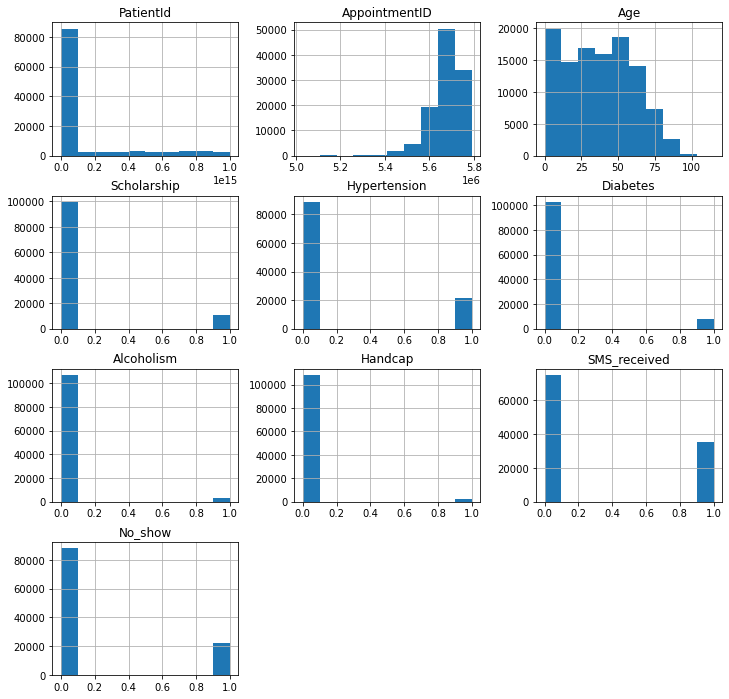

In [20]:
# Checking the histogram of all the columns in the df
df.hist(figsize=(12,12))

<a id='eda'></a>
## Exploratory Data Analysis

<a id='ques1'></a>
### Question 1 (What is the ratio of hounoured appointments to the ones that were not honoured?)

In [21]:
# number of people that showed up, didn't show up and the total number.
showed_up=sum(df['No_show']==0)
not_showed_up=sum(df['No_show']==1)
total=len(df)

In [22]:
# percentage of people that show up and did not show up
perc_show_up=round(showed_up*100/total,2)
perc_not_show_up=round(not_showed_up*100/total,2)

In [23]:
print('{}% of appointments were honoured, while {}% of appointments were not honoured'.format(perc_show_up,perc_not_show_up))

79.81% of appointments were honoured, while 20.19% of appointments were not honoured


Pie chart of the distribution of the **No_show** column

<AxesSubplot:ylabel='No_show'>

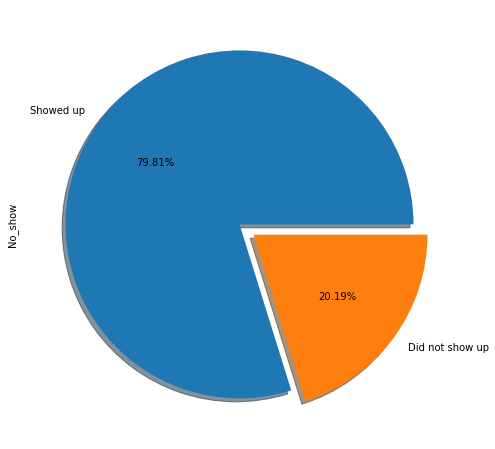

In [24]:
df['No_show'].value_counts().plot(kind='pie',figsize=(8,8),labels=["Showed up","Did not show up"],explode=[0,0.1],autopct='%.2f%%',shadow=True)

<a id='ques2'></a>
### Question 2 (How many Males and Female patients were taken into consideration?)

This question does not mean, **how many male and female appointments were scheduled**.</br>
Every patient has a unique **PatientId** and can have multiple **AppointmentID.**

In [25]:
# Number of patients (not appointments) in total
no_of_patients=df['PatientId'].nunique()
no_of_patients

62298

In [26]:
# Number of male patients
df_male=df.query('Gender=="M"')
male_count=df_male['PatientId'].nunique()
male_count

22253

In [27]:
# Number of female patients
df_female=df.query('Gender=="F"')
female_count=df_female['PatientId'].nunique()
female_count

40045

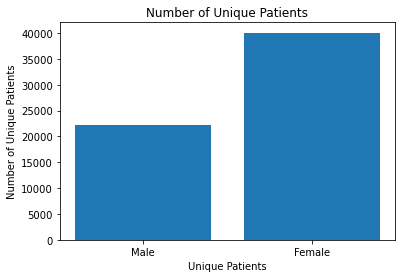

In [28]:
# Plotting the number of male and female patients
plt.bar(['Male', 'Female'], [male_count,female_count])
plt.title("Number of Unique Patients")
plt.xlabel("Unique Patients")
plt.ylabel("Number of Unique Patients");

**Out of 62298 patients, there were 22,253 males and 40,0045 females.**

<a id='ques3'></a>
### Question 3 (In male and female, who tend to have have more appointments?)

We know the number of males and females in the dataset, but do we know if the females would tend to have more hospital appointments?

In [29]:
# number of appointments for a male patient
male_app_count=sum(df['Gender']=='M')
male_app_count

38687

In [30]:
# number of appointments for a female patient
female_app_count=sum(df['Gender']=='F')
female_app_count

71839

In [31]:
# total appointments
total_apps=len(df['AppointmentID'])
total_apps

110526

In [32]:
# propotion of male and female patients to the total number of patients
male_prop=male_count/no_of_patients
female_prop=female_count/no_of_patients

In [33]:
# propotion of male and female appointments to the total number of appointments
male_app_prop=male_app_count/total_apps
female_app_prop=female_app_count/total_apps

**A function for plotting a barchart is defined below. It has 7 parameters**
<ul>
<li>x: A list of numbers that contains the length of the x-axis</li>
<li>y: A list of the first bars in each pair</li>
<li>z: A list of the second bars in each pair</li>
<li>labels: The labels of the plots, separated by a whitespace</li>
<li>x_label: Label of the x-axis</li>
<li>y_label: Label of the y-axis</li>
<li>title: Title of the plot</li>
</ul>

In [34]:
def plotbar(x,y,z,labels,x_label,y_label,title):
    x_axis=np.arange(len(x))
    plt.bar(x_axis - 0.2, y, 0.4, label = labels.split(' ')[0])
    plt.bar(x_axis + 0.2, z, 0.4, label = labels.split(' ')[1])
    
    plt.xticks(x_axis, x)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()

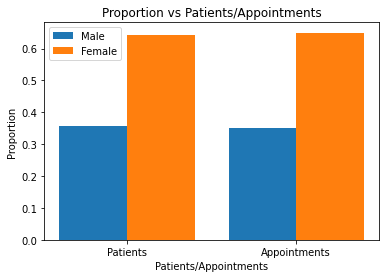

In [35]:
plotbar(['Patients','Appointments'],[male_prop,male_app_prop],[female_prop,female_app_prop],'Male Female','Patients/Appointments','Proportion','Proportion vs Patients/Appointments')

**From what has been plotted above, there is no visible difference in the rate at which either a male or female schedules an appointment with the doctor**

<a id='ques4'></a>
### Question 4 (What category of Age misses their appointments the more?)

In [36]:
# Creating 4 different dataframes for different age brackets
child_df=df.query('Age<18')
youth_df=df.query("Age >= 18 and Age < 34")
adults_df=df.query("Age >= 35 and Age < 59")
elders_df=df.query('Age>=60')

In [37]:
# Calculating the RATE at which each age category misses appointments
child_mean=child_df['No_show'].mean()
youth_mean=youth_df['No_show'].mean()
adults_mean=adults_df['No_show'].mean()
elders_mean=elders_df['No_show'].mean()

Text(0, 0.5, 'Mean No_show')

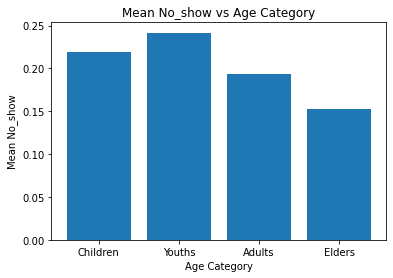

In [38]:
# Bar plot of 'Mean No_show' vs 'Age Category'
locations=[1,2,3,4]
heights=[child_mean,youth_mean,adults_mean,elders_mean]
labels=['Children','Youths','Adults','Elders']
plt.bar(locations,heights,tick_label=labels)
plt.title('Mean No_show vs Age Category')
plt.xlabel('Age Category')
plt.ylabel('Mean No_show')

This plot below is to make the change in values of the y-axis more obvious

Text(0, 0.5, 'Mean No_show')

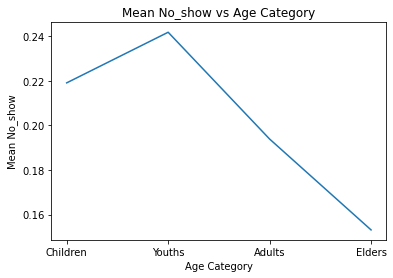

In [39]:
plt.plot(labels,heights)
plt.title('Mean No_show vs Age Category')
plt.xlabel('Age Category')
plt.ylabel('Mean No_show')

**Youths miss their appointments the most, while elders are the group that miss their appointments the least**

<a id='ques5'></a>
### Question 5 ( Is the SMS sending really effective?)

In [40]:
# creating a dataframe for SMS received
df_sms=df[df['SMS_received']==1]

In [41]:
# from the above df, separate into appointment honoured and not honoured and get the frequency of each
sms_came=sum(df_sms['No_show']==0)
sms_no_come=sum(df_sms['No_show']==1)

In [42]:
# creating a dataframe for NO_SMS received
df_no_sms=df[df['SMS_received']==0]

In [43]:
# from the above df, separate into appointment honoured and not honouredand and get the frequency of each
no_sms_came=sum(df_no_sms['No_show']==0)
no_sms_no_come=sum(df_no_sms['No_show']==1)

**Reusing the 'plotbar' function**

The first couple of bars tells the 'showing up' and 'not showing up' when they receive an SMS.
The second couple of bars also tells 'showing up' and 'not showing up' but when no SMS is received.

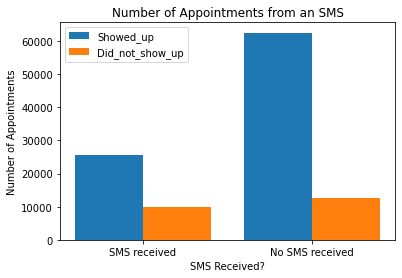

In [44]:
plotbar(['SMS received','No SMS received'],[sms_came,no_sms_came],[sms_no_come,no_sms_no_come],'Showed_up Did_not_show_up',"SMS Received?","Number of Appointments","Number of Appointments from an SMS")

**From the look of things, the SMS is not having the desired effects.</br>
There is a higher proportion of appointments that did not get an SMS but still came compared to those that got an SMS.**

### Limitations
<ul>
<li>It would have been better if the deatils of the number of SMS received was also included, not 0 and 1.</li>
<li>The fact that the Handcap column had many values that are not 0 or 1 was also a limitation.</li>
</ul>

<a id='conclusions'></a>
## Conclusions
<ol>
  <li>About 80% of appointments were fulfilled while  about 20% was not fulfilled.</li>
  <li>Out of 62298 patients, there were 22,253 males and 40,0045 females.</li>
  <li>Male and female patients have almost the same proportion of appointments.</li>
  <li>The youths (18 - 35years) are the worst at keeping to appointments.</li>
  <li>The SMS sending system is not effective.</li>
</ol>

### What can be done?
> Additional research can be done as regards the reason why the SMS sending is not having the desired effects.

> More research can be done on why elders (60+ years old) are the best in keeping appointments

### References
<ul>
    <li>geekforgeeks.com</li>
    <li>stackoverflow.com</li>
    <li>Udacity Reviews</li>
</ul>

In [45]:
df[['ScheduledDay', 'AppointmentDay']] = df[['ScheduledDay', 'AppointmentDay']].apply(pd.to_datetime)

In [46]:
df['days_waited']=df['AppointmentDay']-df['ScheduledDay']

In [47]:
df['days_waited'].dt.days.astype(np.int64).sort_values()

71533      -7
72362      -2
64175      -2
55226      -2
27033      -2
         ... 
102789    178
102788    178
102786    178
102792    178
102795    178
Name: days_waited, Length: 110526, dtype: int64

In [48]:
schedule_day = df['ScheduledDay'].dt.day_name()
appointment_day=df['AppointmentDay'].dt.day_name()

<AxesSubplot:>

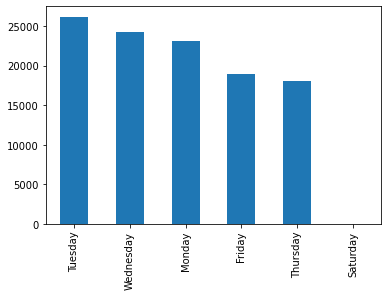

In [49]:
schedule_day.value_counts().plot(kind='bar')

<AxesSubplot:>

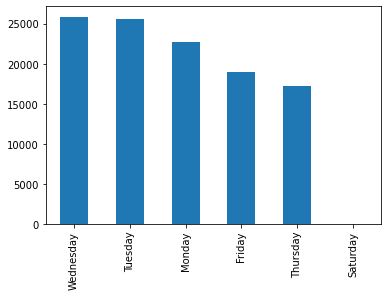

In [50]:
appointment_day.value_counts().plot(kind='bar')

In [51]:
schedule_day.value_counts(5)

Tuesday      0.236759
Wednesday    0.219514
Monday       0.208856
Friday       0.171136
Thursday     0.163518
Saturday     0.000217
Name: ScheduledDay, dtype: float64

In [52]:
appointment_day.value_counts(5)

Wednesday    0.234035
Tuesday      0.231982
Monday       0.205508
Friday       0.172077
Thursday     0.156045
Saturday     0.000353
Name: AppointmentDay, dtype: float64

In [53]:
df_show=df[df['No_show']==0]

In [54]:
df_show

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,days_waited
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1 days +05:21:52
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1 days +07:51:33
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1 days +07:40:56
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1 days +06:30:29
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1 days +07:52:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0,34 days 14:44:25
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0,34 days 16:32:27
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0,40 days 07:56:08
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0,40 days 08:50:37


In [55]:
show_schedule_day = df_show['ScheduledDay'].dt.day_name()
show_appointment_day=df_show['AppointmentDay'].dt.day_name()

<AxesSubplot:>

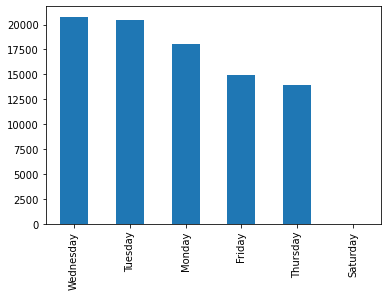

In [56]:
show_appointment_day.value_counts().plot(kind='bar')

<AxesSubplot:>

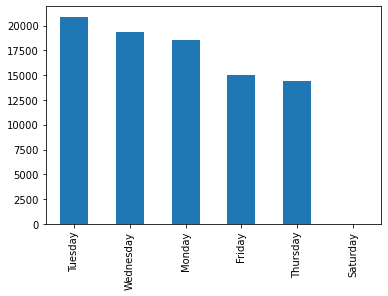

In [57]:
show_schedule_day.value_counts().plot(kind='bar')